# tSNE on Train Set

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from Create_Mappings_and_Matrices import create_mappings_and_matrices

## Create Mappings and Matrices

In [2]:
y, class_mapping, feature_matrices, feature_matrices_rescaled, feature_matrix_labels = create_mappings_and_matrices()

all features train
    Class With Ambiguous and None Corrected Old Class  \
0                     Convertible         Convertible   
1                             SUV                 SUV   
2                           Sedan               Sedan   
3                           Sedan               Sedan   
4                           Sedan               Sedan   
..                            ...                 ...   
408                        Pickup              Pickup   
409                           SUV                 SUV   
410                           SUV                 SUV   
411                         Sedan               Sedan   
412                     Ambiguous                 SUV   

                               harmonized_filename  \
0    Convertible_train_orig_test_00585_resized.jpg   
1            SUV_train_orig_test_07256_resized.jpg   
2         Sedan_train_orig_train_05434_resized.jpg   
3          Sedan_train_orig_test_06236_resized.jpg   
4          Sedan_train_ori

HOG_24_ppc features shape: (6596, 2304)
HSV features shape: (6596, 768)
LBP features shape: (6596, 25)
VGG features shape: (6596, 512)
ViT features shape: (6596, 1280)


items in all_features_df columns not in feature groups (hog, vgg, etc.): []


all features shape: (6596, 11945)
sum of smaller features matrix widths:  11945


## Function to Run tSNE

In [3]:
def get_tsne(X_list, n_components=2):
  '''
  Takes as input a list of feature matrices and returns a list of transformed feature matrices using t-SNE.
  '''
  xtsne_list = []
  for X in X_list:
    tsne = TSNE(n_components=n_components, random_state=0, n_jobs=-1)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list

## Transform Matrices

In [4]:
# dimensionality reduction
tsne_transformed_items  = get_tsne(X_list=feature_matrices_rescaled, n_components=2)
tsne_transformed_items_no_rescaling = get_tsne(X_list=feature_matrices, n_components=2)

# Check shapes
print('tsne transformed items length and first element shape')
print(len(tsne_transformed_items))
print(tsne_transformed_items[0].shape)
print('tsne transformed items no rescaling length and first element shape')
print(len(tsne_transformed_items_no_rescaling))
print(tsne_transformed_items_no_rescaling[0].shape)

tsne transformed items length and first element shape
7
(6596, 2)
tsne transformed items no rescaling length and first element shape
7
(6596, 2)


## Discriminability of Features

In [5]:
def plot_classes(X, y, ax, title):
  '''
  Plot the classes in a 2D space.
  '''

  # color code each cluster (class)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(list(class_mapping.keys())))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==list(class_mapping.values())[k], 0], X[y==list(class_mapping.values())[k], 1], alpha=0.5, facecolors=colorst[k], label = list(class_mapping.keys())[k])

  ax.set_title(title)
  ax.legend()

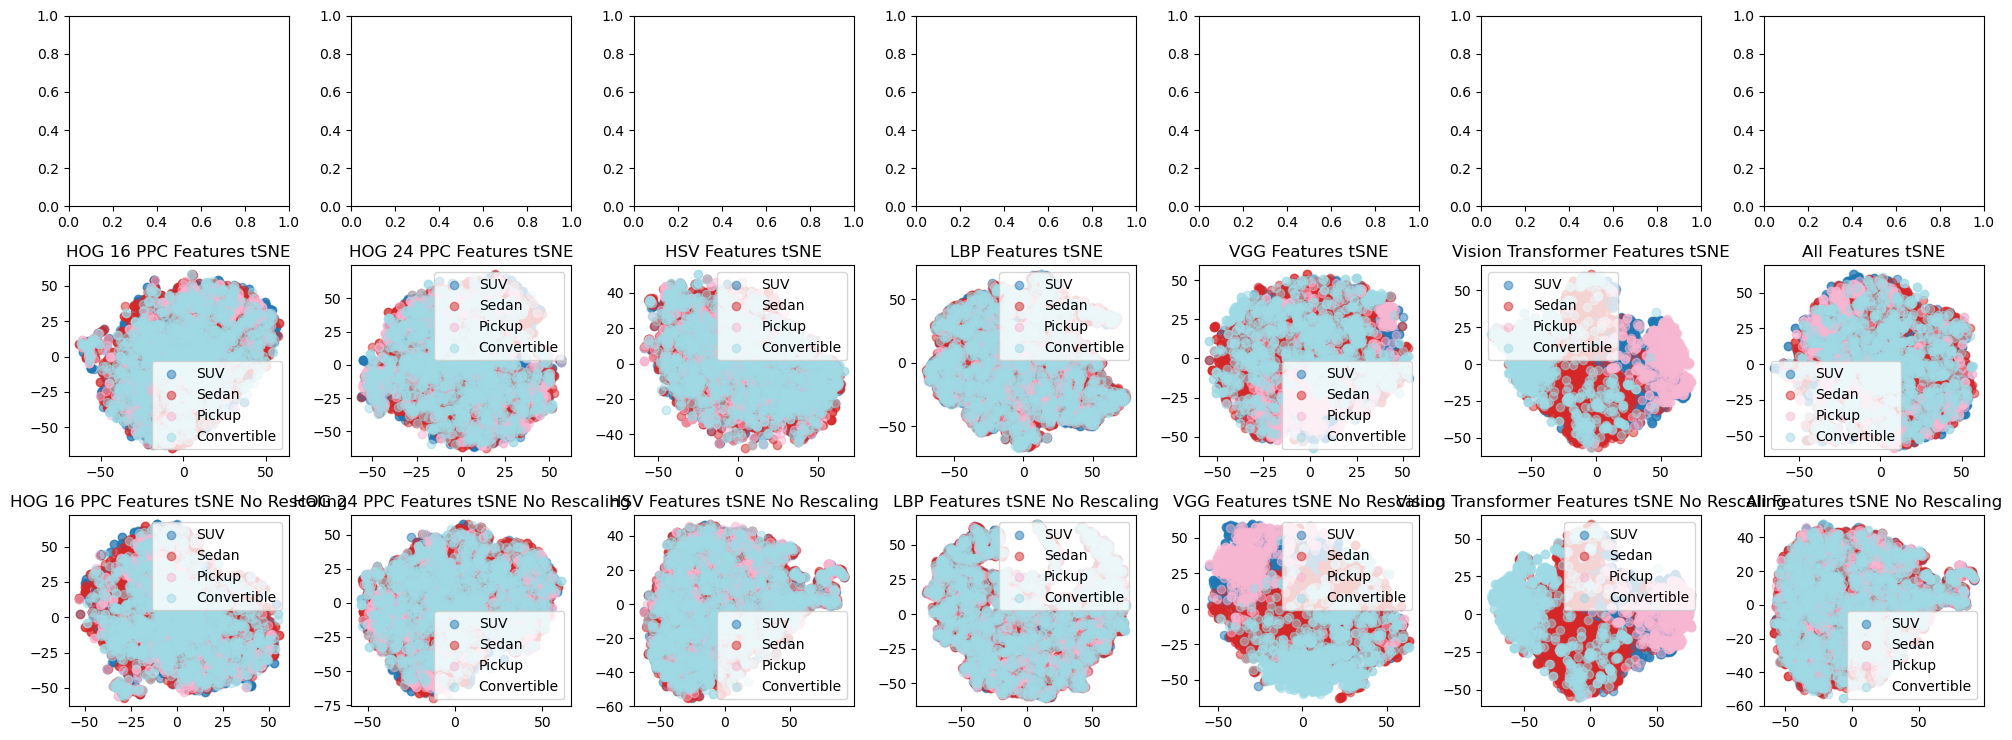

In [6]:
# plot results
fig, ax = plt.subplots(nrows=2, ncols=len(feature_matrices), figsize=(20, 6))

# Iterate over feature matrices transformed and plot
for idx in range(len(feature_matrices)):
  # y is the class labels
  plot_classes(tsne_transformed_items[idx], y, ax[1, idx], title=feature_matrix_labels[idx] + ' tSNE')
  plot_classes(tsne_transformed_items_no_rescaling[idx], y, ax[2, idx], title=feature_matrix_labels[idx] + ' tSNE No Rescaling')

plt.tight_layout()
plt.savefig('../../Output/PCA and tSNE/tSNE_Class_Discrinimability.png')
plt.show()